In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [6]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('PersonalData.csv', index_col=0)
print("Wczytane dane:")
print(df)

df_num = df.drop('Ubezp.', axis=1)

dist_ab = np.linalg.norm(df_num.loc['A'] - df_num.loc['B'])
print(f"\nOdległość euklidesowa (oryginalna): {dist_ab:.2f}")

df_zl = df_num.copy()
df_zl['Zarobki (tys.)'] = df_zl['Zarobki (tys.)'] * 1000
dist_zl = np.linalg.norm(df_zl.loc['A'] - df_zl.loc['B'])
print(f"Odległość po zmianie skali (zarobki x1000): {dist_zl:.2f}")

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
dist_std = np.linalg.norm(df_scaled.loc['A'] - df_scaled.loc['B'])
print(f"Odległość po standaryzacji: {dist_std:.2f}")

dist_mink = distance.minkowski(df_num.loc['A'], df_num.loc['B'], p=3)
dist_manh = distance.cityblock(df_num.loc['A'], df_num.loc['B'])
print(f"Odległość Minkowskiego (p=3): {dist_mink:.2f}")
print(f"Odległość Manhattan: {dist_manh:.2f}")

Wczytane dane:
   Wzrost (cm)  Waga (kg)  Staz (lata)  Zarobki (tys.)  Ocena (pkt.)  Piętro  \
A          190         88            3             3.5             7       6   
B          172         70           12             4.3             5       1   

   Dzieci  Odleglosc (km) Ubezp.  
A       1              25    Tak  
B       4              12    Nie  

Odległość euklidesowa (oryginalna): 30.60
Odległość po zmianie skali (zarobki x1000): 800.58
Odległość po standaryzacji: 5.66
Odległość Minkowskiego (p=3): 24.52
Odległość Manhattan: 68.80


## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [3]:
x = "abcde"
y = "bcdxye"
print(get_D_x_y(x, y)) # Oczekiwany wynik 3

X = "AGGTAB"
Y = "GXTXAYB"
print(get_D_x_y(X, Y)) # Oczekiwany wynik 5

3
5


In [8]:
def get_lcs_length(s1, s2):
    m = len(s1)
    n = len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[m][n]

def get_D_x_y(x, y):
    lcs = get_lcs_length(x, y)
    return len(x) + len(y) - 2 * lcs

x = "abcde"
y = "bcdxye"
print(f"Odległość D(x,y) dla '{x}' i '{y}': {get_D_x_y(x, y)}")

X = "AGGTAB"
Y = "GXTXAYB"
print(f"Odległość D(X,Y) dla '{X}' i '{Y}': {get_D_x_y(X, Y)}")

Odległość D(x,y) dla 'abcde' i 'bcdxye': 3
Odległość D(X,Y) dla 'AGGTAB' i 'GXTXAYB': 5


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

filmy = [
    "kosmiczna stacja astronauta planeta obca",
    "astronauta rakieta księżyc misja kosmiczna",
    "wampir zamek noc krew mroczny"
]

vec = CountVectorizer()
X = vec.fit_transform(filmy)
sim_matrix = cosine_similarity(X)
print("Macierz podobieństwa:\n", sim_matrix)

film4 = ["rakieta mars astronauta czerwona planeta"]
X4 = vec.transform(film4)
sim4 = cosine_similarity(X4, X)
print("Podobieństwo filmu 4 do pozostałych:", sim4)

Macierz podobieństwa:
 [[1.  0.4 0. ]
 [0.4 1.  0. ]
 [0.  0.  1. ]]
Podobieństwo filmu 4 do pozostałych: [[0.51639778 0.51639778 0.        ]]


## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

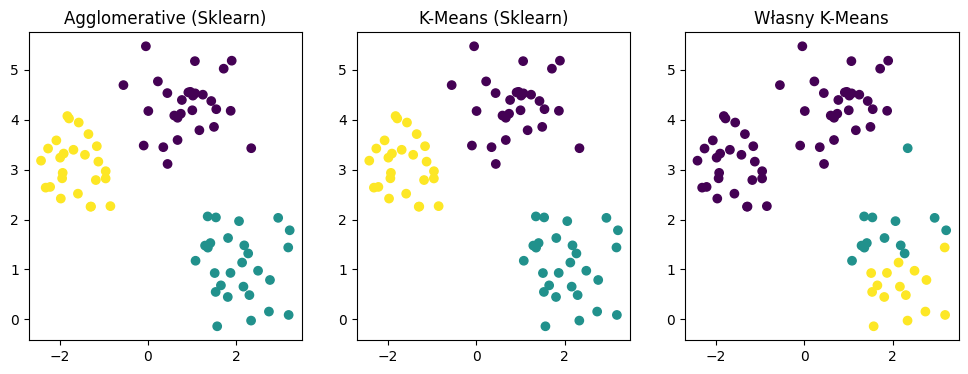

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans

# Wczytanie danych z pliku
df_km = pd.read_csv('k_means_data.csv')
# Jeśli nagłówek jest nietypowy (np. zaczyna się od #), pobieramy same wartości
X_data = df_km.values

# Klasteryzacja hierarchiczna
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X_data)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_data[:,0], X_data[:,1], c=labels_agg, cmap='viridis')
plt.title("Agglomerative (Sklearn)")

# K-Means z biblioteki
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_data)

plt.subplot(1, 3, 2)
plt.scatter(X_data[:,0], X_data[:,1], c=labels_km, cmap='viridis')
plt.title("K-Means (Sklearn)")

# Własna implementacja K-Means
class MojKMeans:
    def __init__(self, n_clusters=3, max_iter=100):
        self.k = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Losowa inicjalizacja centrów
        idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[idx]

        for _ in range(self.max_iter):
            # Obliczanie odległości i przypisywanie do klastrów
            dists = np.linalg.norm(X[:, None] - self.centroids, axis=2)
            self.labels = np.argmin(dists, axis=1)

            # Aktualizacja centrów
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

            # Sprawdzenie warunku stopu
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

my_kmeans = MojKMeans(n_clusters=3)
my_kmeans.fit(X_data)

plt.subplot(1, 3, 3)
plt.scatter(X_data[:,0], X_data[:,1], c=my_kmeans.labels, cmap='viridis')
plt.title("Własny K-Means")
plt.show()

## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [14]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()

Min:
 sepal length (cm)    4.3
sepal width (cm)     2.0
dtype: float64
Max:
 sepal length (cm)    7.9
sepal width (cm)     4.4
dtype: float64
Std:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
dtype: float64
Korelacje:
                    sepal length (cm)  sepal width (cm)
sepal length (cm)            1.00000          -0.11757
sepal width (cm)            -0.11757           1.00000


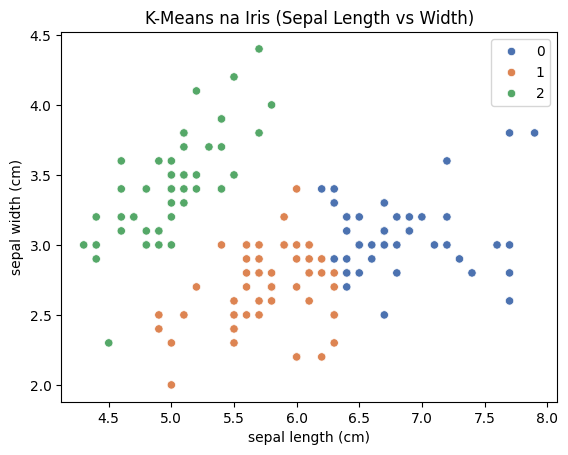

In [15]:
from sklearn import datasets
import seaborn as sns

iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# Wybieramy tylko dwie kolumny zgodnie z poleceniem
X_iris = df_iris[['sepal length (cm)', 'sepal width (cm)']]

print("Min:\n", X_iris.min())
print("Max:\n", X_iris.max())
print("Std:\n", X_iris.std())
print("Korelacje:\n", X_iris.corr())

kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_iris.fit_predict(X_iris)

sns.scatterplot(data=df_iris, x='sepal length (cm)', y='sepal width (cm)', hue=clusters, palette='deep')
plt.title("K-Means na Iris (Sepal Length vs Width)")
plt.show()

## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [ ]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")

In [ ]:
df

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Piętro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3.5,7,6,1,25,Tak
B,172,70,12,4.3,5,1,4,12,Nie


In [ ]:
df.loc['A']

,A
Wzrost (cm),190
Waga (kg),88
Staz (lata),3
Zarobki (tys.),3.5
Ocena (pkt.),7
Piętro,6
Dzieci,1
Odleglosc (km),25
Ubezp.,Tak


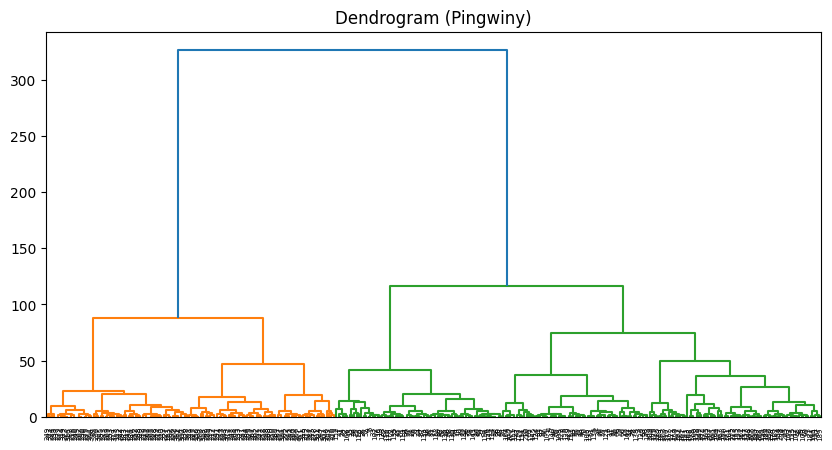

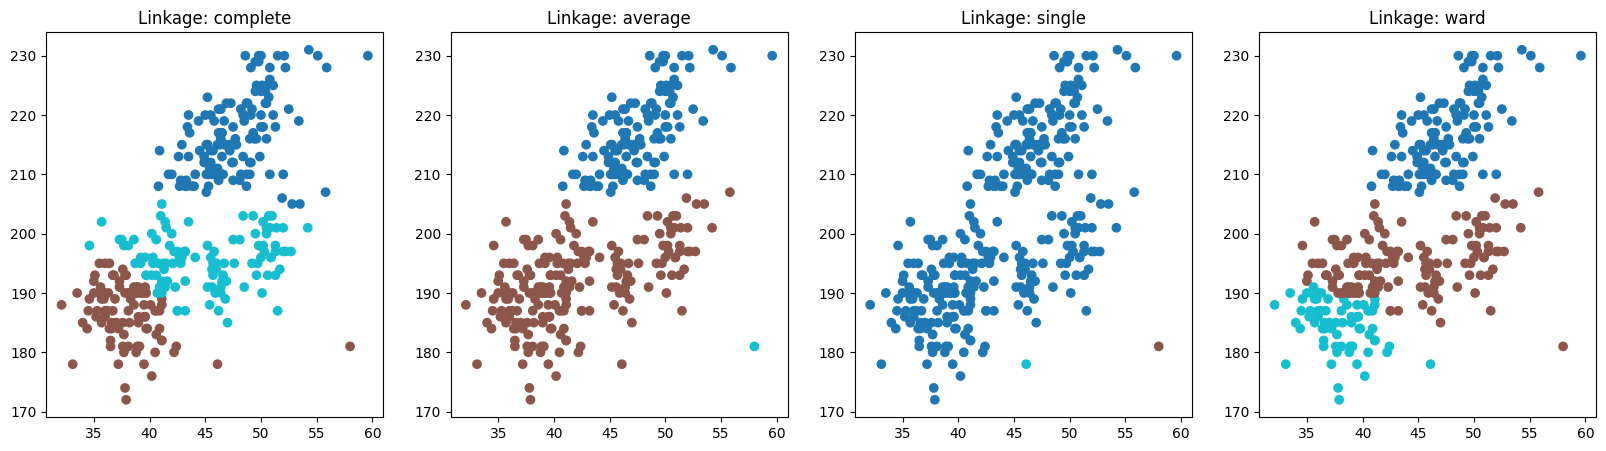

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Wczytanie pliku
df_penguins = pd.read_csv('penguins.csv')
# Usunięcie braków danych
df_penguins.dropna(inplace=True)

X_penguins = df_penguins[['bill_length_mm', 'flipper_length_mm']]

# Dendrogram (metoda warda)
plt.figure(figsize=(10, 5))
dendro = dendrogram(linkage(X_penguins, method='ward'))
plt.title("Dendrogram (Pingwiny)")
plt.show()

# Testowanie różnych metod linkage
methods = ['complete', 'average', 'single', 'ward']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, method in enumerate(methods):
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = model.fit_predict(X_penguins)

    axes[i].scatter(X_penguins['bill_length_mm'], X_penguins['flipper_length_mm'], c=labels, cmap='tab10')
    axes[i].set_title(f"Linkage: {method}")

plt.show()